In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('netflix1.csv')


In [3]:
df.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
df.shape

(8790, 10)

In [6]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

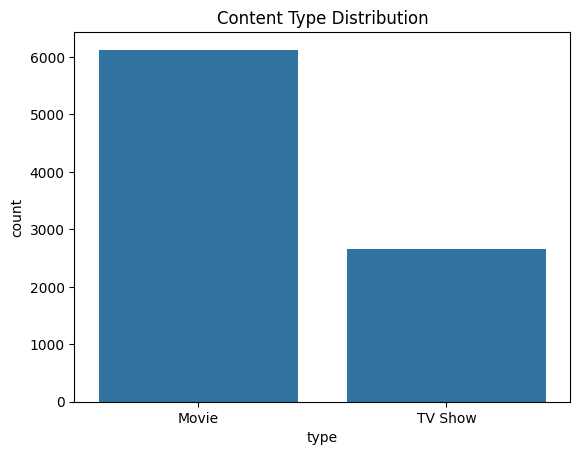

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='type')
plt.title("Content Type Distribution")
plt.show()


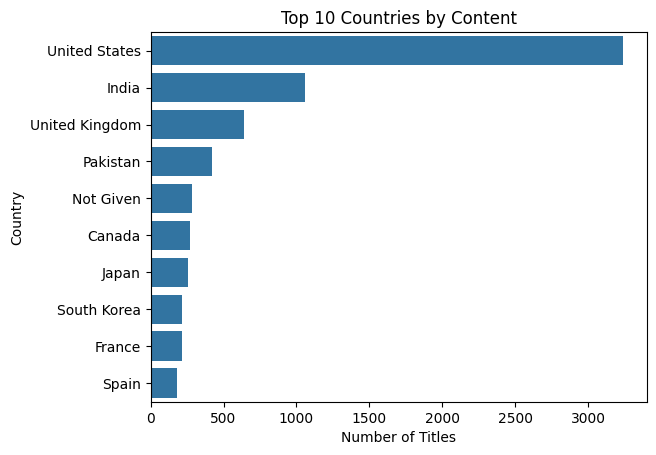

In [8]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

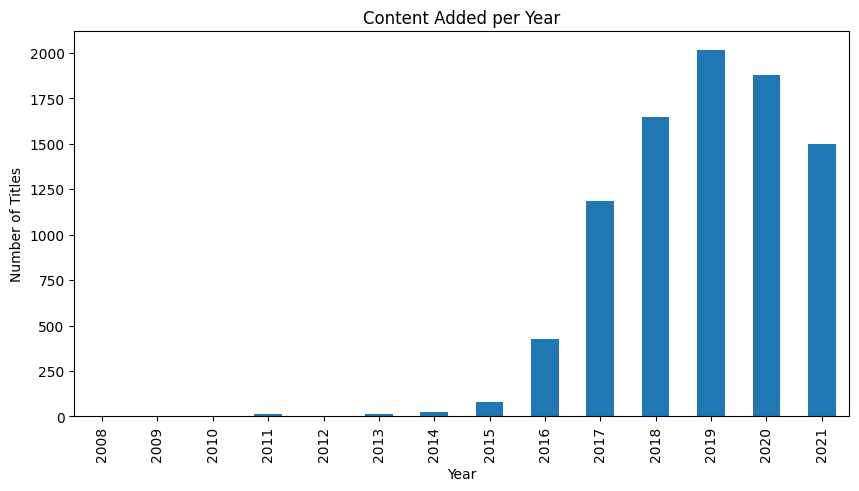

In [9]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df['year_added'] = df['date_added'].dt.year

yearly_add = df['year_added'].value_counts().sort_index()

yearly_add.plot(kind='bar', figsize=(10,5), title='Content Added per Year')
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

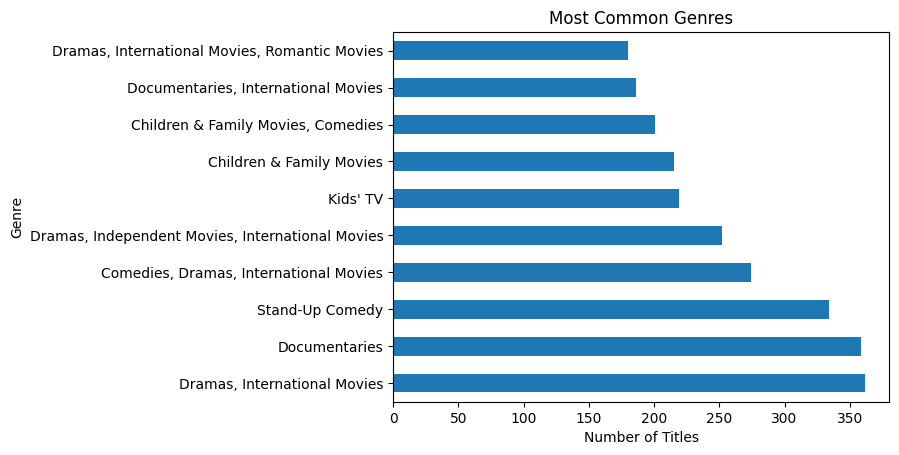

In [10]:
df['listed_in'].value_counts().head(10).plot(kind='barh', title='Most Common Genres')
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()

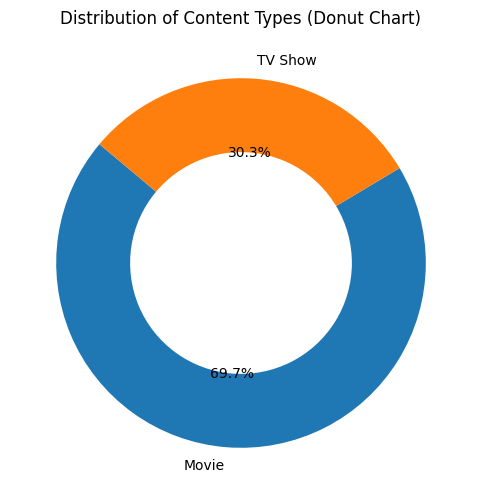

In [16]:
type_counts = df['type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'width': 0.4})
plt.title("Distribution of Content Types (Donut Chart)")
plt.show()

In [18]:
from collections import Counter

C:\Users\Adnan\AppData\Local\Temp\ipykernel_31828\2429843063.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), x='Count', y='Genre', palette='viridis')


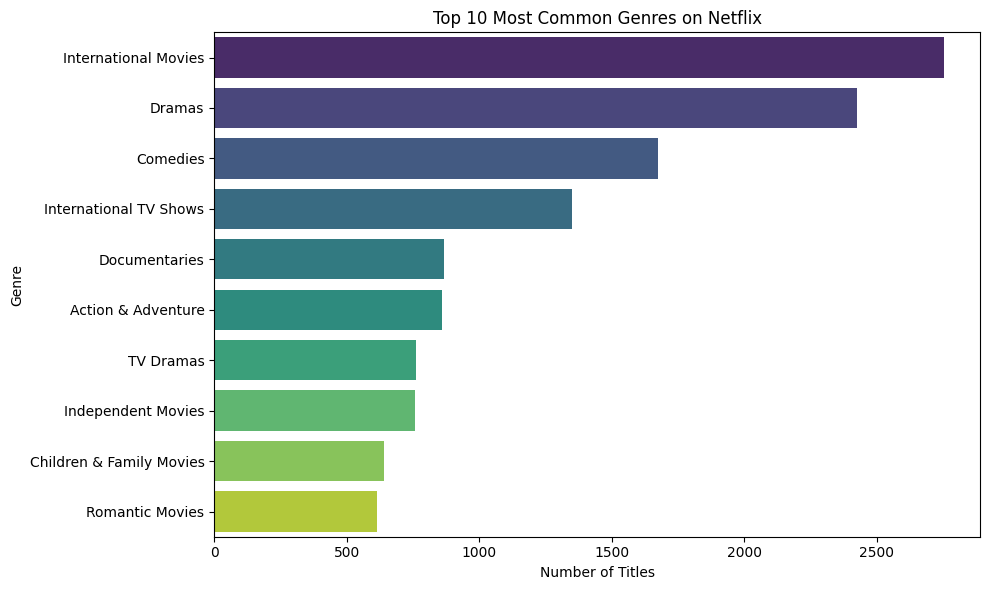

In [20]:
genres_series = df['listed_in'].dropna()

all_genres = [genre.strip() for sublist in genres_series.str.split(',') for genre in sublist]

genre_counts = Counter(all_genres)

genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count']).sort_values(by='Count', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=genre_df.head(10), x='Count', y='Genre', palette='viridis')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()